<h3 align="center"><b>AKADEMIA GÓRNICZO-HUTNICZA</b></h3>
<h3 align="center">im. Stanisława Staszica w Krakowie</h3>
<br/><br/>
<b><h3 align="center">WYDZIAŁ ZARZĄDZANIA</h3></b>
<br/><br/>
<h3 align="center"><img src=https://qa.agh.edu.pl/images/logos/logo-agh-simple.png></h3>
<br/><br/>

<h3 align="center"><b>Metody pozyskiwania wiedzy z danych</b></h3><br/>
<h3 align="center">Porównanie działania wybranych algorytmów uczenia maszynowego w problemie
klasyfikacji danych z raportu World Happiness Report 2021</h3>
<br/><br/>

Dąbrowski Bartosz<br/>
Zientarska Patrycja<br/>
Nasternak Magdalena<br/>

Kierunek: Informatyka i Ekonometria<br/>
Studia: II Stopnia, Stacjonarne

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

<b>World Happiness Report</b> to przełomowe badanie stanu globalnego szczęścia. Pierwszy raport został opublikowany w 2012 roku, drugi w 2013 roku, trzeci w 2015 roku, a czwarty w 2016 roku. World Happiness 2017, które klasyfikuje 149 krajów według ich poziomu szczęścia, zostało opublikowane w ONZ podczas wydarzenia z okazji Międzynarodowego Dnia Szczęścia 20 marca. Raport nadal zyskuje globalne uznanie, ponieważ rządy, organizacje i społeczeństwo obywatelskie coraz częściej wykorzystują wskaźniki szczęścia do podejmowania decyzji politycznych. Wiodący eksperci w różnych dziedzinach – ekonomia, psychologia, analiza ankiet, statystyka krajowa, zdrowie, polityka publiczna i inne – opisują, w jaki sposób pomiary dobrostanu mogą być skutecznie wykorzystywane do oceny postępów narodów. Raporty dokonują przeglądu stanu szczęścia we współczesnym świecie i pokazują, jak nowa nauka o szczęściu wyjaśnia osobiste i narodowe różnice w szczęściu.

In [2]:
data = pd.read_csv("world-happiness-report-2021.csv")

In [3]:
data.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [5]:
data.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


Sprawdzamy występowanie obserwacji niepełnych.

In [6]:
data_na=data[data.isna().any(axis=1)]
data_na

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual


Szczęśliwie, w analizowanym zbiorze nie znalazły się takie przypadki - dane są kompletne i nie zawierają NA.

Do zmiennej features przypisujemy kolumny, które wykorzystamy jako zmienne objaśniające.

In [7]:
features=['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

Kolejnym krokiem jest sprawdzenie korelacji pomiędzy zmiennymi - w idealnym przypadku powinna być jak najwyższa ze zmienną objaśnianą, a jak najniższe pomiędzy zmiennymi objaśniającymi.

<AxesSubplot:>

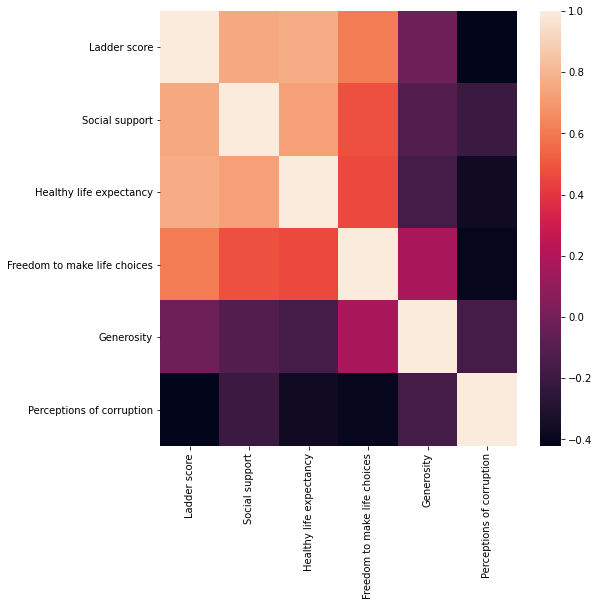

In [8]:
cor=data.loc[:,['Ladder score', 'Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
cor=data.loc[:,['Ladder score', 'Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].corr()

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(ax=ax, data=cor)

In [9]:
cor

,Ladder score,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.756888,0.768099,0.607753,-0.017799,-0.421140
Social support,0.756888,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


Wyraźnie widać, że zmienna Generosity jest mało powiązana z resztą, niewielkie korelacje występują także w przypadku zmiennej dotyczącej korupcji.

W celu implementacji algorytmów klasyfikacyjnych zmienna 'Ladder score' została przekształcona w zmienną zero-jedynkową. Jako punkt graniczny uznajemy wartość 6.

In [10]:
data['Ladder score 2']=data['Ladder score']
data.loc[data['Ladder score 2'] < 5, 'Ladder score 2'] = 0
data.loc[data['Ladder score 2'] >= 5, 'Ladder score 2'] = 1

<h3>K-means</h3>

<p>Metoda k-średnich jest metodą należącą do grupy algorytmów analizy skupień tj. analizy polegającej na szukaniu i wyodrębnianiu grup obiektów podobnych (skupień) . Reprezentuje ona grupę algorytmów niehierarchicznych. Główną różnicą pomiędzy niehierarchicznymi i hierarchicznymi algorytmami jest konieczność wcześniejszego podania ilości skupień.
Przy pomocy metody k-średnich zostanie utworzonych k różnych możliwie odmiennych skupień. Algorytm ten polega na przenoszeniu obiektów ze skupienia do skupienia tak długo aż zostaną zoptymalizowane zmienności wewnątrz skupień oraz pomiędzy skupieniami. Oczywistym jest, iż podobieństwo w skupieniu powinno być jak największe, zaś osobne skupienia powinny się maksymalnie od siebie różnić.
</p>

<b>Zasada działania algorytmu jest następująca:</b><br><br>
<b>Ustalamy liczbę skupień.</b><br>
Jedną z metod ustalenia ilości skupień jest umowny jej wybór i ewentualna późniejsza zmiana tej liczby w celu uzyskania lepszych wyników. Wybór liczby skupień może być oparty również na wynikach innych analiz.
<br><b>Ustalamy wstępne środki skupień.</b><br>
Środki skupień tak zwane centroidy możemy dobrać na kilka sposobów: losowy wybór k obserwacji, wybór k pierwszych obserwacji, dobór w taki sposób, aby zmaksymalizować odległości skupień. Jedną z najczęściej stosowanych metod jest kilkakrotne uruchomienie algorytmu i wybór najlepszego modelu, gdy wstępnie środki skupień były wybierane losowo.
<br><b>Obliczamy odległości obiektów od środków skupień.</b><br>
Wybór metryki jest bardzo istotnym etapem w algorytmie. Wpływa ona na to, które z obserwacji będą uważane za podobne, a które za zbyt różniące się od siebie. Najczęściej stosowaną odległością jest odległość euklidesowa. Stosuje się również kwadrat tej odległości czy też odległość Czebyszewa.
<br><b>Przypisujemy obiekty do skupień</b><br>
Dla danej obserwacji porównujemy odległości od wszystkich skupień i przypisujemy ją do skupienia, do którego środka ma najbliżej.
<br><b>Ustalamy nowe środki skupień</b><br>
Najczęściej nowym środkiem skupienia jest punkt, którego współrzędne są średnią arytmetyczną współrzędnych punktów należących do danego skupienia.
Wykonujemy kroki 3,4,5 do czasu, aż warunek zatrzymania zostanie spełniony.
Najczęściej stosowanym warunkiem stopu jest ilość iteracji zadana na początku lub brak przesunięć obiektów pomiędzy skupieniami.



<b>Zalety algorytmu k-średnich:</b><br><br>
<ul><li>niska złożoność, a co za tym idzie wysoka wydajność działania</li>
<li>przy dużych zbiorach i niskich ilościach grup algorytm ten będzie zdecydowanie szybszy niż pozostałe algorytmy tej klasy</li>
    <li>pogrupowane zbiory są z reguły bardziej ciaśniejsze i zbite</li></ul>

  <b>Wady algorytmu k-średnich:</b><br><br>

<ul><li>nie pomaga w określeniu ilości grup (K)</li><li>
różne wartości początkowe prowadzą do różnych wyników</li><li>
    działa dobrze tylko dla „sferycznych” skupisk o jednorodnej gęstości</li></ul>


Standaryzujemy dane - jest to wskazane do uzyskania miarodajnych wyników w ramach analizy skupień.

In [11]:
x = data.loc[:, features].values
x_scaler =StandardScaler().fit_transform(x) 

Przyjmujemy arbitralnie 2 klastry, co pozwoli nam na imitację klasyfikatora - nie jest to idealne rozwiązane, jako że algorytm k-średnich nie został do tego stworzony, jednak pozwoli na porównanie tej motody z typowymi klasyfikatorami.

In [12]:
kmeans = KMeans(n_clusters=2).fit(StandardScaler().fit_transform(data[features]))
centroids = kmeans.cluster_centers_
print(centroids)
label = kmeans.fit_predict(StandardScaler().fit_transform(data[features]))

[[ 0.56800967  0.56260595  0.5919131   0.34647502 -0.17617948 -0.12856696]
 [-1.0595565  -1.04947649 -1.10414559 -0.64630917  0.3286425   0.23982683]]


Przypisujemy wyniki klasteryzacji do nowo utworzonej kolumny w celu późniejszego porównania.

In [13]:
result=kmeans.labels_
data['label_kmeans']=result

In [14]:
data[data['label_kmeans']==1]['Country name']
#print(data[data['label_kmeans']==1]['Country name'])

0          Finland
1          Denmark
2      Switzerland
3          Iceland
4      Netherlands
          ...     
109        Ukraine
122        Lebanon
126         Jordan
128      Sri Lanka
145       Botswana
Name: Country name, Length: 97, dtype: object

Macierz pomyłek dla algorytmu:

In [15]:
confusion_matrix(data['Ladder score 2'],data['label_kmeans'])

array([[40,  8],
       [12, 89]], dtype=int64)

Algorytm jest zbyt łagodny - zbyt łatwo przyporządkowuje obserwacje do klastra, w którym znajdują się kraje szczęśliwe.

Wyniki precyzji, czułości, F-score dla obu klastrów prezentują się następująco:

In [16]:
precision_recall_fscore_support(data['Ladder score 2'],data['label_kmeans'])

(array([0.76923077, 0.91752577]),
 array([0.83333333, 0.88118812]),
 array([0.8      , 0.8989899]),
 array([ 48, 101], dtype=int64))

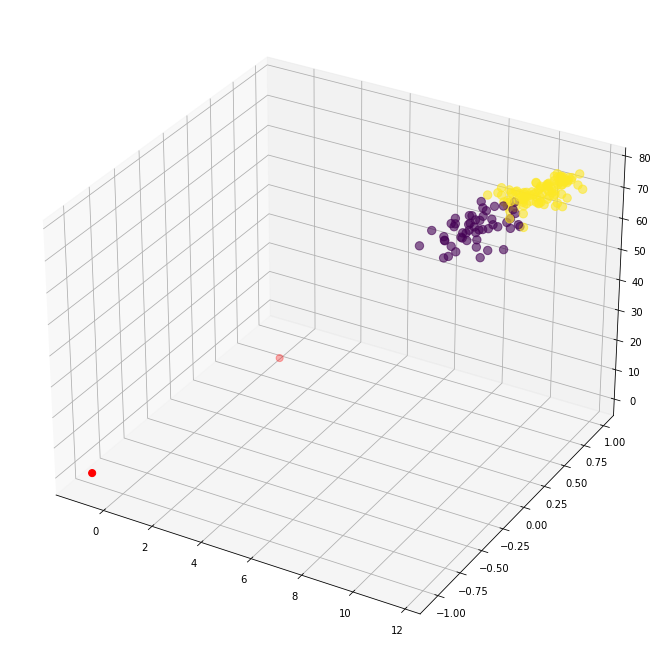

In [17]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
cb = ax.scatter(x[:,0],x[:,1],x[:,2], c=label,s=70, alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

<h3>RANDOM FOREST</h3>

<p><b>Las losowy</b> (ang. random forest) to metoda uczenia maszynowego dla klasyfikacji, regresji. Zbudowany jest z wielu klasyfikatorów (drzew decyzyjnych) - stąd nazwa “las”. Każde drzewo budowane na innym, losowo wybranym podzbiorze zbioru danych uczących. Działanie lasów losowych polega na klasyfikacji za pomocą grupy drzew decyzyjnych. Końcowa decyzja jest podejmowana w wyniku głosowania większościowego nad klasami wskazanymi przez poszczególne drzewa decyzyjne.</p>


<b>Najważniejszymi zaletami lasu losowego są:</b><br><br>
<ul><li>Odporność na rozmaite problemy związane z danymi. Mamy tutaj na myśli brak danych, zmienne objaśniające bez znaczenia, dużą liczbę zmiennych objaśniających czy wartości odstające.</li><li>
Możliwość dokładniejszego odtworzenia złożonych zależności niż byłyby to w stanie zrobić drzewa decyzyjne. Warto tutaj wspomnieć, że siła predykcyjna lasu losowego jest zazwyczaj nieco mniejsza, ale wciąż porównywalna z sieciami neuronowymi.</li><li>
Odporność na przeuczenie.</li><li>
Stabilność.</li><li>
Możliwość interakcji pomiędzy zmiennymi.</li><li>
Możliwość określenia różnych kosztów błędnych klasyfikacji.</li></ul>


70% obserwacji przyporządkowujemy do zbioru uczącego, 30% do zbioru testowego.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, data['Ladder score 2'], test_size = 0.3, random_state=457)

In [19]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini')

In [20]:
rf_fitted = rf.fit(X_train[features], y_train)

In [21]:
rf_fitted.score(X_test[features],y_test)

0.8

Skuteczność modelu lasu losowego na danych testowych jest na poziomie 91,1%.

In [22]:
rf_predict=rf.predict(X_test[features])

Precyzja, czułość i F score są bardziej wyrównane niż było to w przypadku metody k-średnich.

In [23]:
precision_recall_fscore_support(y_test,rf_predict)

(array([0.75, 0.84]),
 array([0.78947368, 0.80769231]),
 array([0.76923077, 0.82352941]),
 array([19, 26], dtype=int64))

Macierz pomyłek:

In [24]:
confusion_matrix(y_test,rf_predict)

array([[15,  4],
       [ 5, 21]], dtype=int64)

<h3>BOOSTING TREES</h3>

<p><b>Gradient Boosting</b> to technika uczenia maszynowego do regresji, klasyfikacji i innych zadań, która tworzy model predykcyjny w postaci zestawu słabych modeli predykcyjnych, zazwyczaj drzew decyzyjnych. Gdy drzewo decyzyjne jest słabym uczniem, otrzymany algorytm nazywa się drzewami wzmacnianymi gradientem, które zwykle przewyższają las losowy. Buduje model w sposób etapowy, tak jak robią to inne metody wzmacniające, i uogólnia je, umożliwiając optymalizację dowolnej różniczkowalnej funkcji straty.</p>


Algorytm Boosting Trees rozwinął się z zastosowania metod wzmacniania do drzew regresyjnych. Główną ideą jest tworzenie ciągu (bardzo) prostych drzew, z których każde kolejne jest zbudowane do predykcji reszt generowanych przez poprzednie. Metoda buduje drzewa binarne, tzn. dzieli dane na dwie próby w każdym węźle podziału. Przypuśćmy, że mamy ograniczyć złożoność drzew do 3 węzłów (w rzeczywistości użytkownik może ustalać jaka ma być złożoność): tzn. drzewo składa się z korzenia i dwóch potomków czyli jest tylko jeden podział. W kolejnych krokach wzmacniania (algorytmu wzmacniania drzew) określany jest pojedynczy (najlepszy) podział danych i obliczane są odchyłki wartości obserwowanych od średnich (reszty w każdym podziale). Kolejne drzewo o trzech węzłach jest dopasowywane do tych reszt i wyznacza kolejny podział, który jest dopasowywany do tych reszt i wyznacza kolejny podział, przy którym wariancja reszt (czyli błąd) jest jeszcze mniejsza (dla danego wcześniej ciągu drzew).


<b>Zalety</b><br><br>
Jest to uogólniony algorytm, który działa dla każdej różniczkowalnej funkcji straty.
Często zapewnia wyniki predykcyjne, które są znacznie lepsze niż inne algorytmy
Potrafi obsłużyć brakujące dane - imputacja nie jest wymagana. Ta metoda jest wrażliwa na wartości odstające . Wartości odstające będą miały znacznie większe wartości resztowe niż wartości inne niż wartości odstające, więc wzmocnienie gradientu skupi nieproporcjonalną część uwagi na tych punktach. Wykorzystanie średniego błędu bezwzględnego (MAE) do obliczenia błędu zamiast średniego błędu kwadratowego (MSE) może pomóc zmniejszyć wpływ tych wartości odstających, ponieważ ta ostatnia daje większą wagę większym różnicom. Parametr „kryterium” pomaga wybrać tę funkcję.
Jest podatny na nadmierne dopasowanie, jeśli liczba drzew jest zbyt duża. Parametr „n_estimators” może pomóc określić dobry punkt do zatrzymania, zanim nasz model zacznie nadmiernie dopasowywać


In [25]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=0.9, min_samples_leaf=5,
                                              min_samples_split=6, random_state=419).fit(X_train[features], y_train)

Wyniki wzmocnienia gradientowego są na bardzo wysokim poziomie - skuteczność jest równa 88,8%.

In [26]:
gb.score(X_test[features],y_test)

0.7777777777777778

In [27]:
gb_predict=gb.predict(X_test[features])

Dla obu klas, parametry wynoszą powyżej 70%.

In [28]:
precision_recall_fscore_support(y_test,gb_predict)

(array([0.71428571, 0.83333333]),
 array([0.78947368, 0.76923077]),
 array([0.75, 0.8 ]),
 array([19, 26], dtype=int64))

Macierz pomyłek:

In [29]:
confusion_matrix(y_test,gb_predict)

array([[15,  4],
       [ 6, 20]], dtype=int64)

<h3>Linear Dyscriminant Analysis</h3>

<b>Liniowa Analiza Dyskryminacyjna</b> (ang. Linear Discriminant Analysys, LDA) jest jedną z metod klasyfikacji danych. Należy do metod statystycznych, dokonuje podziału na obszary graniczne funkcjami liniowymi. Używana w uczeniu maszynowym do znalezienia liniowej kombinacji cech, które najlepiej rozróżniają dwie lub więcej klas obiektów lub zdarzeń. Wynikowe kombinacje są używane jako klasyfikator liniowy lub, częściej, służą redukcji wymiarów do późniejszej klasyfikacji statystycznej.
Liniowa analiza dyskryminacyjna zakłada, że funkcje gęstości prawdopodobieństwa w klasach ´ k = 1, 2 maj ˛a D-wymiarowe rozkłady normalne N (µk , Σ) o równych macierzach kowariancji w klasach. Można więc powiedzieć, że LDA jest równoważne FLD (liniowy dyskryminator Fishera) przy dodatkowych założeniach, ˙ że rozkłady w klasach są gaussowskie i macierze kowariancji w klasach są równe
Σ = Σ1 = Σ2. 

In [30]:
lda=LDA(solver='svd').fit(X_train[features], y_train)

Skuteczność LDA kształtuje się na poziomie 93,3%.

In [31]:
lda_score=lda.score(X_test[features],y_test)
lda_score

0.8444444444444444

In [32]:
lda_predict=lda.predict(X_test[features])

W przypadku LDA precyzja i F-score są nieco niższe dla klasy 0, oznaczającej kraje szczęśliwe.

In [33]:
lda_stats=precision_recall_fscore_support(y_test,lda_predict)
lda_stats

(array([0.8 , 0.88]),
 array([0.84210526, 0.84615385]),
 array([0.82051282, 0.8627451 ]),
 array([19, 26], dtype=int64))

In [34]:
confusion_matrix(y_test,lda_predict)

array([[16,  3],
       [ 4, 22]], dtype=int64)

In [35]:
y_test['rf_result']=rf_predict

W następnym kroku porównamy skuteczność metod na pełnym datasecie.

In [36]:
rf_full_score=rf.score(data[features],data['Ladder score 2'])
rf_full_score

0.9395973154362416

In [37]:
rf_full_pred=rf.predict(data[features])

In [38]:
rf_pred_pd=pd.DataFrame(rf_predict)

In [39]:
gb_full_score=gb.score(data[features],data['Ladder score 2'])
gb_full_score

0.9328859060402684

In [40]:
gb_full_pred=gb.predict(data[features])

In [41]:
lda_full_score=lda.score(data[features],data['Ladder score 2'])
lda_full_score

0.8926174496644296

In [42]:
lda_full_pred=lda.predict(data[features])

Jak można zauważyć, random forest oraz gradient boosting uzyskały niemal 100% skuteczność, podczas gdy LDA wypadło wyraźnie gorzej z niespełna 90%.

In [43]:
data['rf_result']=rf_full_pred

In [44]:
data['gb_result']=gb_full_pred

In [45]:
data['lda_result']=lda_full_pred

Porównujemy ilość niezgodnych ze stanem faktycznym predykcji dla poszczególnych modeli.

In [46]:
#careful at this point - clusters are assigned randomly so it may show correct predictions as well as errors
n_kmeans_errors = (data['label_kmeans'] != data['Ladder score 2']).sum()
n_kmeans_errors

20

In [47]:
n_rf_errors = (data['rf_result'] != data['Ladder score 2']).sum()
n_rf_errors

9

In [48]:
n_gb_errors = (data['gb_result'] != data['Ladder score 2']).sum()
n_gb_errors

10

In [49]:
n_lda_errors = (data['lda_result'] != data['Ladder score 2']).sum()
n_lda_errors

16

Jak widzimy, najgorzej wypada algorytm k-średnich, najlepiej metody oparte na drzewach. Wyniki nie są zaskoczeniem - k-means jest algorytmem uczenia nienadzorowanego - dodatkowo bolączką tego modelu okazała się niska czułość i przyporządkowanie zbyt wielu obserwacji do klastra z krajami szczęśliwymi. Liniowa analiza dyskryminacyjna to stosunkowo dobry algorytm, pozwalający na uzyskiwanie solidnych wyników kalsyfikacji, ustępuje jednak opartym na metodach bootstrapowych modelom lasów - random forest i gradient boostingowi. Oba te modele okazały się niemal bezbłędne, co pozwala z czystym sumieniem uznać je za najlepsze i godne polecenia w podobnych problemach.